## Initial comparison for the machine learning models to be used for the Student Sleep Quality dataset

In [103]:
import pandas as pd

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
def evaluateLazyClassifiers(data_path, features_to_ignore, features_for_regression):
    data = pd.read_csv(data_path)
    data = data.drop(features_to_ignore, axis = 1)
    
    features = data.drop(features_for_regression, axis = 1)
    targets = data[features_for_regression]
    features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)
    
    lazyClassifier = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
    models, predictions = lazyClassifier.fit(features_train, features_test, targets_train, targets_test)
    return models
    


In [105]:
#Integrating the dataset, ignoring the student ID and predicting the sleep quality by using the other features
models = evaluateLazyClassifiers('data/student_sleep_patterns.csv', ['Student_ID'], ['Sleep_Quality'])


  0%|          | 0/32 [00:00<?, ?it/s]

 81%|████████▏ | 26/32 [00:01<00:00, 16.82it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 17
[LightGBM] [Info] Start training from score -2.120264
[LightGBM] [Info] Start training from score -2.380547
[LightGBM] [Info] Start training from score -2.253795
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Info] Start training from score -2.494957
[LightGBM] [Info] Start training from score -2.120264
[LightGBM] [Info] Start training from score -2.407946
[LightGBM] [Info] Start training from score -2.525729
[LightGBM] [Info] Start training from score -2.120264
[LightGBM] [Info] Start training from score -2.353878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

100%|██████████| 32/32 [00:02<00:00, 14.58it/s]


### Possible models to use:

In [106]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.12,0.13,None,0.09,0.05
ExtraTreesClassifier,0.14,0.13,None,0.14,0.23
CalibratedClassifierCV,0.13,0.12,None,0.08,0.21
LabelPropagation,0.13,0.12,None,0.14,0.03
LabelSpreading,0.13,0.12,None,0.14,0.04
ExtraTreeClassifier,0.11,0.11,None,0.10,0.03
DummyClassifier,0.18,0.10,None,0.05,0.02
QuadraticDiscriminantAnalysis,0.10,0.10,None,0.10,0.03
BaggingClassifier,0.10,0.10,None,0.10,0.09


### Ranking of all possible Models to use:

In [107]:
ranked_models = models.sort_values(by='Accuracy', ascending=False)
ranked_models


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DummyClassifier,0.18,0.10,None,0.05,0.02
ExtraTreesClassifier,0.14,0.13,None,0.14,0.23
LabelSpreading,0.13,0.12,None,0.14,0.04
CalibratedClassifierCV,0.13,0.12,None,0.08,0.21
LabelPropagation,0.13,0.12,None,0.14,0.03
SGDClassifier,0.12,0.13,None,0.09,0.05
ExtraTreeClassifier,0.11,0.11,None,0.10,0.03
QuadraticDiscriminantAnalysis,0.10,0.10,None,0.10,0.03
BaggingClassifier,0.10,0.10,None,0.10,0.09


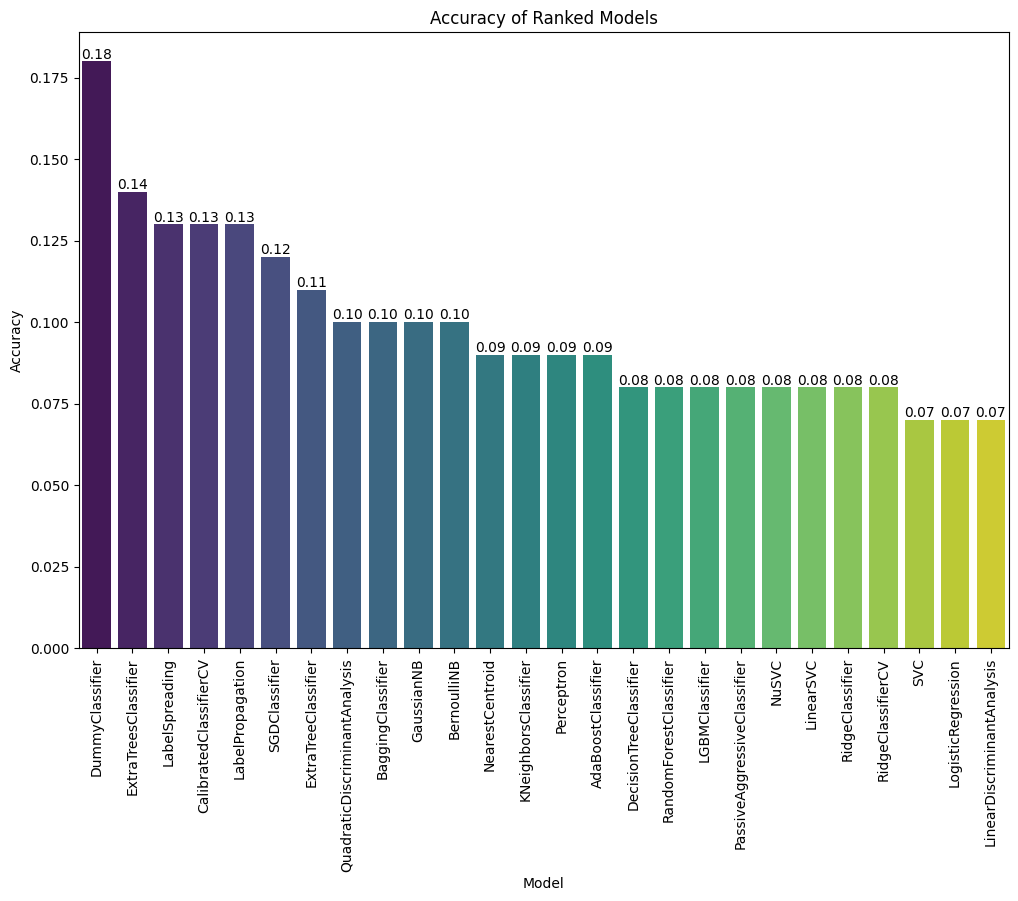

In [108]:
plt.figure(figsize=(12, 8))
sns.barplot(x=ranked_models.index, y='Accuracy', data=ranked_models, palette='viridis')
plt.xticks(rotation=90)
plt.title('Accuracy of Ranked Models')
plt.xlabel('Model')
for index, value in enumerate(ranked_models['Accuracy']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.ylabel('Accuracy')
plt.show()

### Ranking of Selected Models:
- K Nearest Neighbor Classifier
- Decision Tree Classifier
- Logistic Regression

In [109]:
selected_models = ranked_models.loc[['KNeighborsClassifier', 'DecisionTreeClassifier', 'LogisticRegression']]
selected_models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.09,0.09,None,0.08,0.03
DecisionTreeClassifier,0.08,0.08,None,0.08,0.04
LogisticRegression,0.07,0.06,None,0.07,0.05


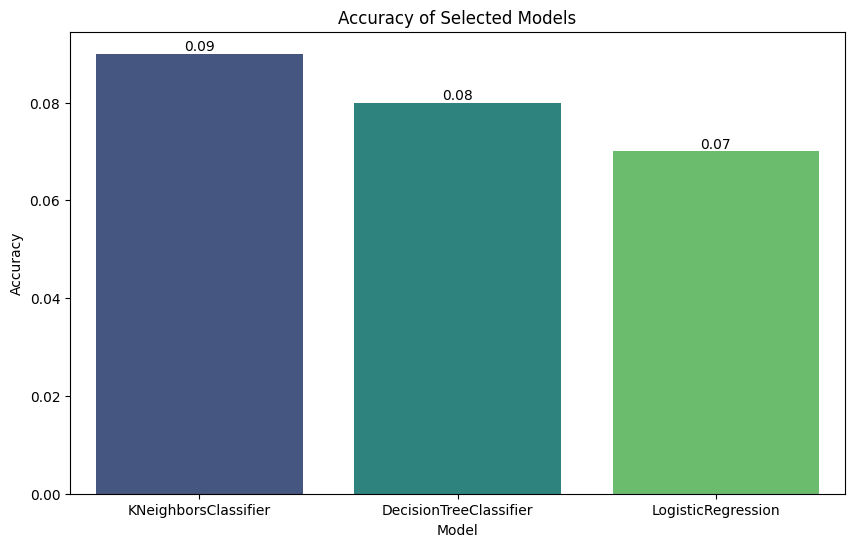

In [110]:
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_models.index, y='Accuracy', data=selected_models, palette='viridis')
plt.title('Accuracy of Selected Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
for index, value in enumerate(selected_models['Accuracy']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()